In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Telco_Customer_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


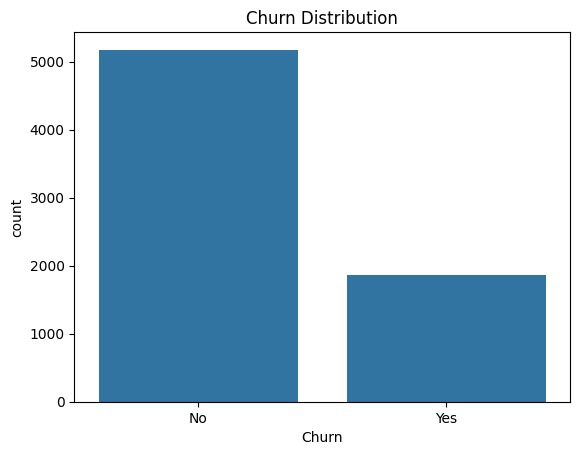

In [3]:
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

In [4]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

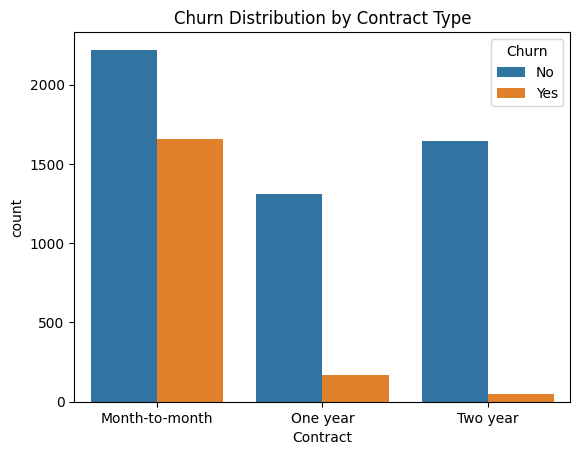

In [5]:
sns.countplot(x='Contract', data=df, hue='Churn')
plt.title('Churn Distribution by Contract Type')
plt.show()

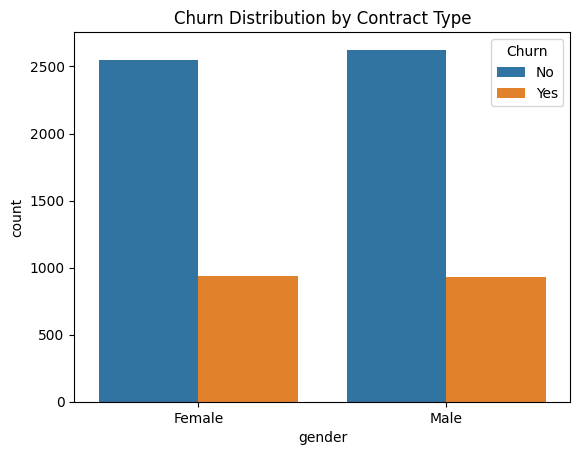

In [7]:
sns.countplot(x='gender', data=df, hue='Churn')
plt.title('Churn Distribution by Contract Type')
plt.show()

In [8]:
num_cols = df.select_dtypes(include = np.number).columns

df[num_cols].head()

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


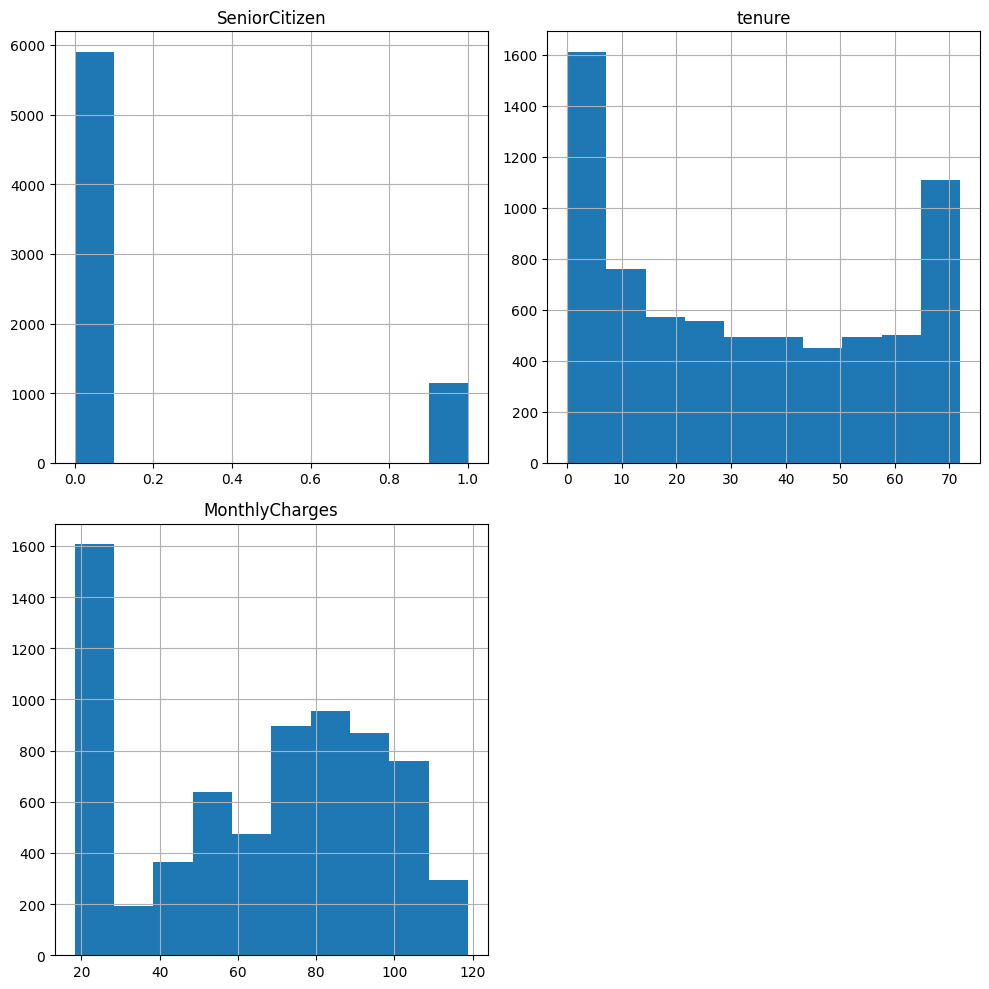

In [9]:
df[num_cols].hist(figsize=(10,10))
plt.tight_layout()
plt.show()

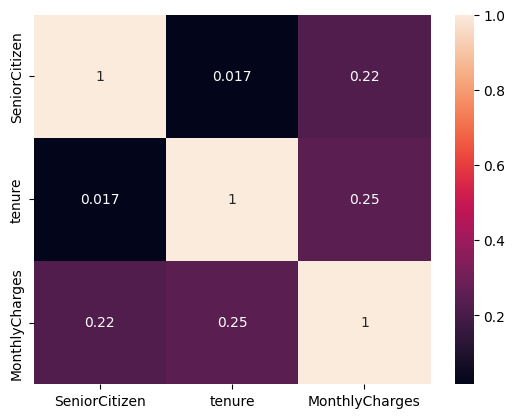

In [22]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)
plt.show()

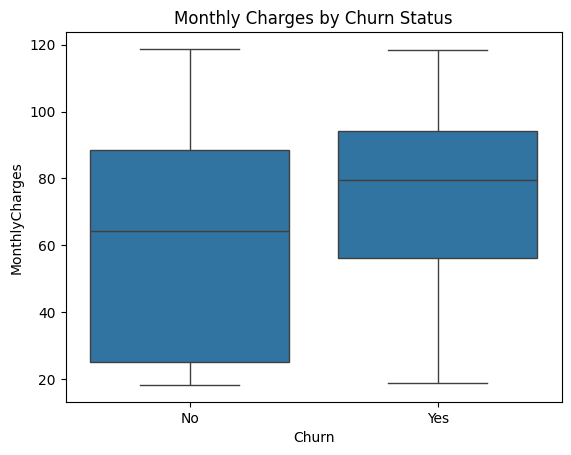

In [11]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn Status')
plt.show()

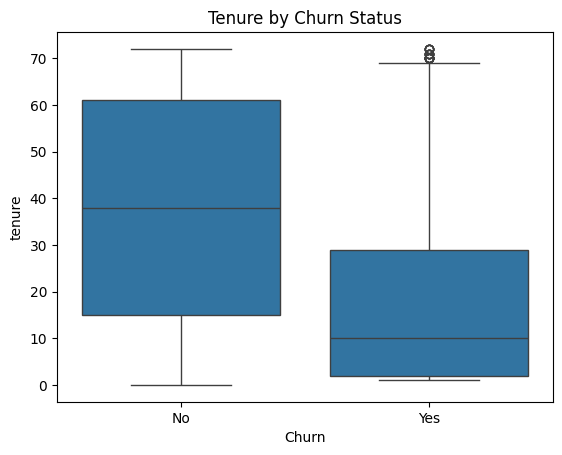

In [12]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure by Churn Status')
plt.show()

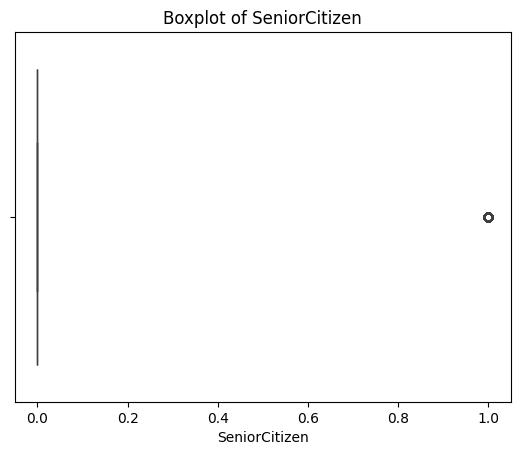

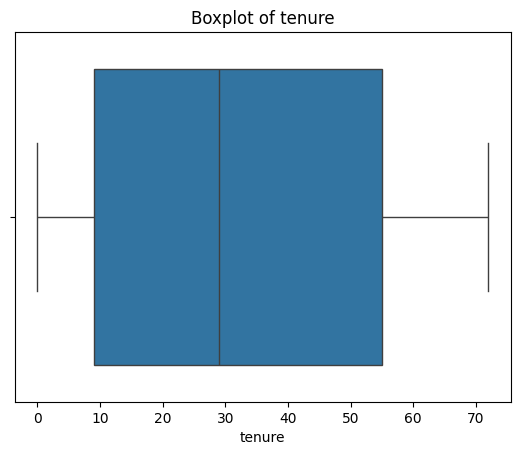

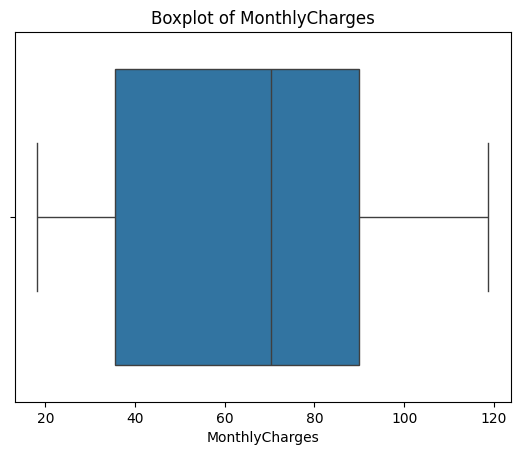

In [13]:
for col in num_cols:
    sns.boxplot(x = df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

<Axes: xlabel='SeniorCitizen'>

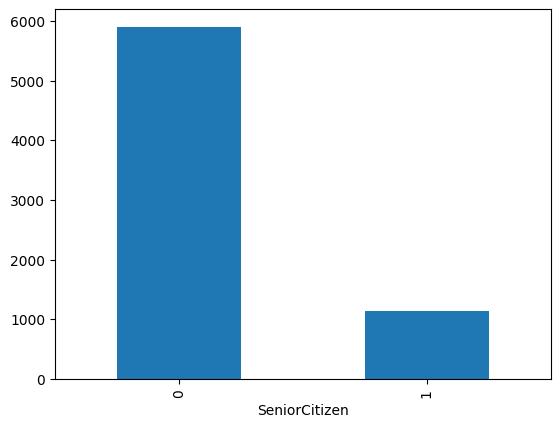

In [15]:
df['SeniorCitizen'].value_counts().plot(kind='bar')

In [16]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

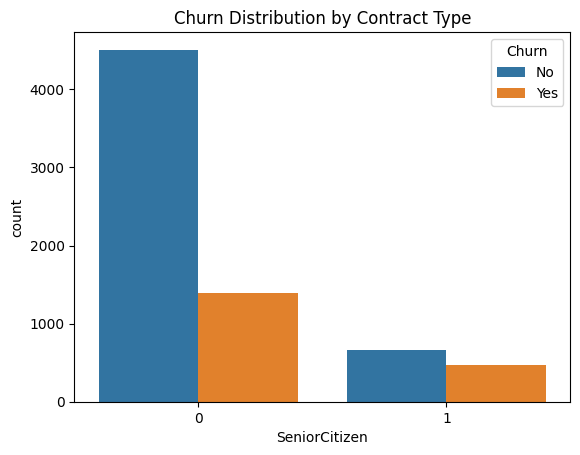

In [18]:
sns.countplot(x='SeniorCitizen', data=df, hue='Churn')
plt.title('Churn Distribution by Contract Type')
plt.show()

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

In [24]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


In [25]:
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

chi_scores = chi2(X, y)
pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi_scores[0],
    'p-value': chi_scores[1]
}).sort_values(by='Chi2 Score', ascending=False)

,Feature,Chi2 Score,p-value
4,tenure,16278.923685,0.000000e+00
17,MonthlyCharges,3680.787699,0.000000e+00
18,TotalCharges,1616.483021,0.000000e+00
14,Contract,1115.780167,1.227941e-244
8,OnlineSecurity,551.611529,5.615882e-122
11,TechSupport,523.303866,8.086236e-116
9,OnlineBackup,230.086520,5.707869e-52
10,DeviceProtection,191.303140,1.651539e-43
1,SeniorCitizen,134.351545,4.576959e-31
3,Dependents,133.036443,8.876729e-31


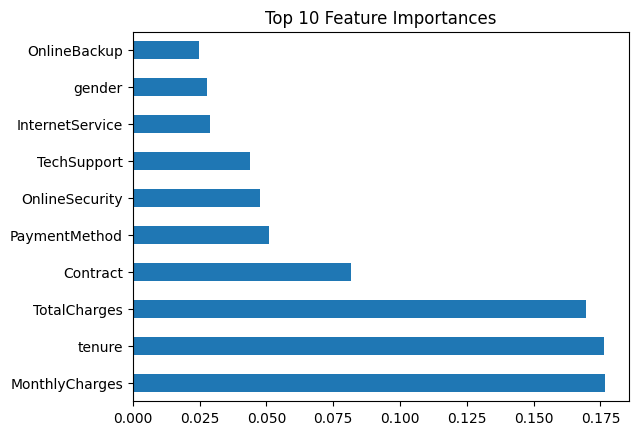

In [26]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()

In [27]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64